# xy_sine_funcanimation
+ Create animation of xy chart using `matplotlib` library.
+ See [FuncAnimation](https://matplotlib.org/stable/api/animation_api.html#funcanimation)  from matplotlib.animation.

0


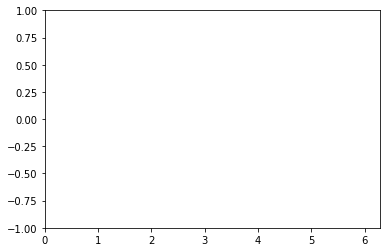

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

i = [0]

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    print(i[0])
    i[0] += 1
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    print(i[0])
    i[0] += 1
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [20]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from matplotlib import rc
rc('animation', html='jshtml')

# This is setup code
class_capacity = [100, 100, 100]
classes = ["CS1301", "CS1331", "CS1332"]
current_enrolled_students = [10, 0, 0]
fig, axes = plt.subplots(figsize=(8,6))
#axes =fig.add_subplot()
axes.set_ylim(0, 100)

cmap = plt.get_cmap("jet")

def animate(i):
    axes.clear()
    #axes.set_ylim(0, 100)
    for i in range(len(current_enrolled_students)):
        current_enrolled_students[i] = random.randint(0, class_capacity[i])
    barlist = axes.bar(classes, current_enrolled_students)
    for i in range(len(barlist)):
        barlist[i].set_color(cmap(current_enrolled_students[i] / class_capacity[i]))

ani = FuncAnimation(fig, animate, interval=400, blit=False, frames=9, repeat=False)
plt.close()
#plt.show()
ani